# Wine

## Dependencies

In [ ]:
from pathlib import Path

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics

## Directories

In [ ]:
# Fetch original directory
owd = Path.cwd()
# Data directory
datsetDir = Path(Path(owd).parents[0], "datasets/")
print(datsetDir)

c:\Users\justu\Desktop\approachingML\src\datasets


## Data import 

In [ ]:
# Read data
df = pd.read_csv(Path(datsetDir, "wine/wineQualityReds.csv"))

## Main

In [ ]:
# A mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}
df.loc[:, "quality"] = df.quality.map(quality_mapping)

# Shuffle dataframe
df = df.sample(frac = 1)
# Reset indces
df = df.reset_index(drop = True)

# Define split
trainProp = 2/3
testProp = 1-trainProp

# Training data
df_train = df.head(int(df.shape[0] * trainProp))
# Test data
df_test = df.tail(int(df.shape[0] * testProp))

# Initialize lists to store accuracies for training and test data
train_accuracies = []
test_accuracies = []

# Define training depth
depth = 25

In [ ]:
# iterate over a few depth values
for d in range(1, depth):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth = d)
    # columns/features for training
    # note that, this can be done outside
    # the loop
    cols = [   
        'fixed.acidity',
        'volatile.acidity',
        'citric.acid',
        'residual.sugar',
        'chlorides',
        'free.sulfur.dioxide',
        'total.sulfur.dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
    ]
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)



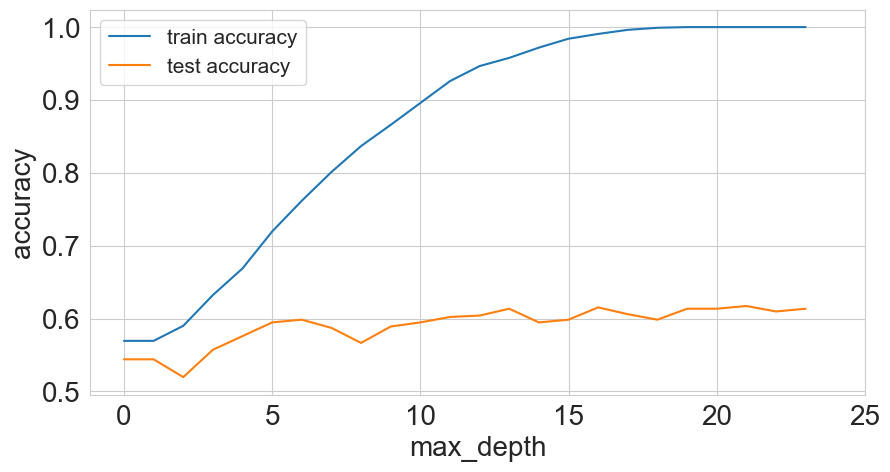

In [ ]:
# Plotting
matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

%matplotlib inline

# Create plots
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()